In [1]:
!pip install pandas==0.22.0
!pip install numpy==1.14.6
!pip install matplotlib==2.1.2

▲库的版本变更

In [2]:
import sys
import pandas
import numpy
import matplotlib
print('python version : ', sys.version_info[0:3])
print('pandas version : ', pandas.__version__)
print('numpy version : ', numpy.__version__)
print('matplotlib version : ', matplotlib.__version__)

python version :  (3, 6, 9)
pandas version :  0.22.0
numpy version :  1.14.6
matplotlib version :  2.1.2


▲Python和库的版本输出

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

▲预先执行的代码

In [4]:
df = pd.DataFrame([[0,np.nan,2],[None,4,5]], columns=list('abc'))
df.isna()

,a,b,c
0,False,True,False
1,True,False,False


▲ 程序清单 6.1 DataFrame 类的 isna 方法

In [5]:
df2 = df.copy()
df2.loc[1, 'a'] = float('inf')
df2.loc[0, 'b'] = -np.inf
df2

,a,b,c
0,0.000000,-inf,2
1,inf,4.000000,5


In [6]:
print(pd.options.mode.use_inf_as_na)
df2.isna()

False


,a,b,c
0,False,False,False
1,False,False,False


In [7]:
pd.options.mode.use_inf_as_na = True
df2.isna()

,a,b,c
0,False,True,False
1,True,False,False


▲ 程序清单 6.2 pandas 中 inf、–inf 的处理

In [8]:
print(np.nan == np.nan)
print(None == None)

False
True


▲ 程序清单 6.3 np.nan 和 None

In [9]:
df == np.nan

,a,b,c
0,False,False,False
1,False,False,False


▲ 程序清单 6.4 np.nan 的判断

In [10]:
df['b'] = pd.Timestamp('20190101')
df.iloc[0, 1] = np.nan
df

,a,b,c
0,0.0,NaT,2
1,NaN,2019-01-01,5


▲ 程序清单 6.5 pandas 中对 NaT 的处理

In [11]:
ser = pd.Series([1,2,np.nan,None])
ser

0    1.0
1    2.0
2    NaN
3    NaN
dtype: float64

▲ 程序清单 6.6 包含数值类型值的处理

In [12]:
ser = pd.Series(['a','b',np.nan,None])
ser

0       a
1       b
2     NaN
3    None
dtype: object

▲ 程序清单 6.7 包含 object 类型值的 Series 对象和 None 的处理

In [13]:
df = pd.DataFrame([[1,2],[np.nan,4],[np.nan,np.nan]], columns=['a','b'])
df

,a,b
0,1.0,2.0
1,NaN,4.0
2,NaN,NaN


In [14]:
df['a'] + df['b']

0    3.0
1    NaN
2    NaN
dtype: float64

▲ 程序清单 6.8 包含 NaN 的运算结果

In [15]:
val = np.arange(0,9).reshape(3, 3)
df = pd.DataFrame(val, columns=list('abc'))
df.loc[0, 'a'], df.loc[1, 'b'] = np.nan, np.nan
df.isna()

,a,b,c
0,True,False,False
1,False,True,False
2,False,False,False


In [16]:
pd.isnull(df)

,a,b,c
0,True,False,False
1,False,True,False
2,False,False,False


▲ 程序清单 6.9 isna 方法和 isna 函数

In [17]:
df.notna()

,a,b,c
0,False,True,True
1,True,False,True
2,True,True,True


▲ 程序清单 6.10 DataFrame 类的 notna 方法

In [18]:
df['a'].isna()

0     True
1    False
2    False
Name: a, dtype: bool

In [19]:
df['a'].notna()

0    False
1     True
2     True
Name: a, dtype: bool

▲ 程序清单 6.11 Series 类的 isna 方法和 notna 方法

In [20]:
df[df['a'].isna()]

,a,b,c
0,NaN,1.0,2


In [21]:
df[df['a'].notna()]

,a,b,c
1,3.0,NaN,5
2,6.0,7.0,8


▲ 程序清单 6.12 基于 isna 方法和 notna 方法的引用

In [22]:
df.index = [0,np.nan,2]
print(df.index.isna())
print(df.index.notna())

[False  True False]
[ True False  True]


▲ 程序清单 6.13 Index 对象的 isna 方法和 notna 方法

In [23]:
df == np.nan

,a,b,c
0.0,False,False,False
NaN,False,False,False
2.0,False,False,False


▲ 程序清单 6.14 使用运算符“==”判断缺失值

In [24]:
val = np.arange(0,9).reshape(3, 3)
df = pd.DataFrame(val, index=list('def'), columns=list('abc'))
df.loc['d', 'a'], df.loc['e', 'b'] = np.nan, np.nan
df

,a,b,c
d,NaN,1.0,2
e,3.0,NaN,5
f,6.0,7.0,8


In [25]:
df.dropna(axis=0)

,a,b,c
f,6.0,7.0,8


In [26]:
df.dropna(axis=1)

,c
d,2
e,5
f,8


▲ 程序清单 6.15 DataFrame 类的 dropna 方法

In [27]:
df2 = df.copy()
df2['a'] = np.nan
df2.dropna(axis=1, how='any')

,c
d,2
e,5
f,8


In [28]:
df2.dropna(axis=1, how='all')

,b,c
d,1.0,2
e,NaN,5
f,7.0,8


▲ 程序清单 6.16 dropna 方法的 how 参数

In [29]:
df2.loc['d','b'] = np.nan
df2.loc['d','c'] = np.nan
df2

,a,b,c
d,NaN,NaN,NaN
e,NaN,NaN,5.0
f,NaN,7.0,8.0


In [30]:
df2.dropna(axis=1, thresh=1)

,b,c
d,NaN,NaN
e,NaN,5.0
f,7.0,8.0


In [31]:
df2.dropna(axis=1, thresh=2)

,c
d,NaN
e,5.0
f,8.0


▲ 程序清单 6.17 dropna 方法的 thresh 参数

In [32]:
df.dropna(axis=1,subset=['e'])

,a,c
d,NaN,2
e,3.0,5
f,6.0,8


▲ 程序清单 6.18 dropna 方法的 subset 参数

In [33]:
df.dropna(axis=1, subset=['d','f'])

,b,c
d,1.0,2
e,NaN,5
f,7.0,8


▲ 程序清单 6.19 dropna 方法的 subset 参数（多个标签）

In [0]:
df.dropna(axis=1, subset=['e','f'], inplace=True)

In [35]:
df

,a,c
d,NaN,2
e,3.0,5
f,6.0,8


▲ 程序清单 6.20 dropna 方法的 inplace 参数

In [36]:
ser = pd.Series([0,None,2,np.nan])
ser.dropna()

0    0.0
2    2.0
dtype: float64

▲ 程序清单 6.21 Series 类的 dropna 方法

In [2]:
val = np.arange(0,9).reshape(3, 3)
df = pd.DataFrame(val, index=list('def'), columns=list('abc'))
df.loc['d', 'a'], df.loc['e', 'b'] = np.nan, np.nan
df.fillna(value=0)

,a,b,c
d,0.0,1.0,2
e,3.0,0.0,5
f,6.0,7.0,8


▲ 程序清单 6.22 DataFrame 类的 fillna 方法

In [38]:
filling = {'a':100, 'b':200, 'c':300}
df.fillna(value=filling)

,a,b,c
d,100.0,1.0,2
e,3.0,200.0,5
f,6.0,7.0,8


▲ 程序清单 6.23 fillna 方法的 value 参数

In [39]:
df.fillna(method='bfill',axis=0)

,a,b,c
d,3.0,1.0,2
e,3.0,7.0,5
f,6.0,7.0,8


▲ 程序清单 6.24 fillna 方法和 method 参数（bfill）

In [40]:
df.fillna(method='bfill',axis=1)

,a,b,c
d,1.0,1.0,2.0
e,3.0,5.0,5.0
f,6.0,7.0,8.0


▲ 程序清单 6.25 fillna 方法和 method 参数（bfill）

In [41]:
df.fillna(method='ffill', axis=0)

,a,b,c
d,NaN,1.0,2
e,3.0,1.0,5
f,6.0,7.0,8


▲ 程序清单 6.26 fillna 方法和 method 参数（ffill）

In [42]:
df2 = df.copy()
df2['a'] = np.nan
df2.loc['d', 'b'] = np.nan
df2.loc['d', 'c'] = np.nan
df2

,a,b,c
d,NaN,NaN,NaN
e,NaN,NaN,5.0
f,NaN,7.0,8.0


▲ 程序清单 6.27 DataFrame 对象的创建

In [43]:
df2.fillna(method='bfill', limit=1, axis=0)

,a,b,c
d,NaN,NaN,5.0
e,NaN,7.0,5.0
f,NaN,7.0,8.0


▲ 程序清单 6.28 fillna 方法的 limit 参数（值为 1）

In [44]:
df2.fillna(method='bfill', limit=2, axis=0)

,a,b,c
d,NaN,7.0,5.0
e,NaN,7.0,5.0
f,NaN,7.0,8.0


▲程序清单 6.29 fillna 方法的 limit 参数（值为 2）

In [45]:
ser = pd.Series([1,2,3], index=['a','b','c'])
ser

a    1
b    2
c    3
dtype: int64

In [46]:
df.fillna(ser)

,a,b,c
d,1.0,1.0,2
e,3.0,2.0,5
f,6.0,7.0,8


▲ 程序清单 6.30 使用 fillna 方法和 Series 对象置换缺失值

In [47]:
df.mean()

a    4.5
b    4.0
c    5.0
dtype: float64

In [48]:
df.fillna(df.mean(), axis=0)

,a,b,c
d,4.5,1.0,2
e,3.0,4.0,5
f,6.0,7.0,8


▲ 程序清单 6.31 fillna 方法和 mean 方法

In [49]:
df.fillna(df.median(), axis=0)

,a,b,c
d,4.5,1.0,2
e,3.0,4.0,5
f,6.0,7.0,8


In [50]:
df.fillna(df.max(), axis=0)

,a,b,c
d,6.0,1.0,2
e,3.0,7.0,5
f,6.0,7.0,8


▲ 程序清单 6.32 使用 fillna 方法、median 方法、max 方法进行缺失值的置换

In [3]:
df.fillna(df.mean(axis=1), axis=1)

NotImplementedError: Currently only can fill with dict/Series column by column

▲ 程序清单 6.33 fillna 方法的 NotImplementedError

In [53]:
val = np.arange(0,25).reshape(5, 5)
df = pd.DataFrame(val, columns=list('abcde'))

for i, c in enumerate(df.columns):
    df.loc[i, c] = np.nan

df

,a,b,c,d,e
0,NaN,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,NaN,13.0,14.0
3,15.0,16.0,17.0,NaN,19.0
4,20.0,21.0,22.0,23.0,NaN


▲ 程序清单 6.34 DataFrame 对象的创建

In [54]:
df['b'].interpolate(method='linear')

0     1.0
1     6.0
2    11.0
3    16.0
4    21.0
Name: b, dtype: float64

▲ 程序清单 6.35 Series 类的 interpolate 方法（linear）

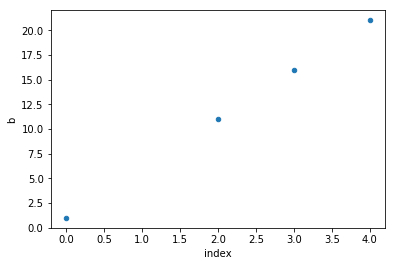

In [55]:
df['index'] = df.index
df.plot(kind='scatter', x='index',y='b')

▲ 程序清单 6.36 索引标签和列 b 的散点图

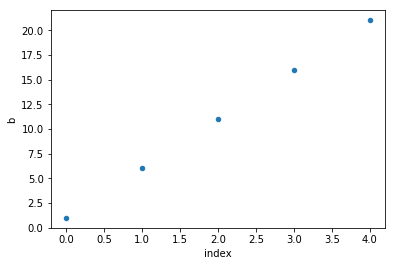

In [56]:
df2 = df.interpolate(method='linear')
df2.plot(kind='scatter', x='index',y='b')

▲ 程序清单 6.37 索引标签和列 b 的散点图（置换后）

In [57]:
ser = pd.Series([4,np.nan,np.nan,16])
ser.interpolate(method='linear')

0     4.0
1     8.0
2    12.0
3    16.0
dtype: float64

▲程序清单 6.38 Series 类的 interpolate 方法

In [58]:
ser.index = [0,2,5,10]
ser

0      4.0
2      NaN
5      NaN
10    16.0
dtype: float64

In [59]:
ser.interpolate(method='linear')

0      4.0
2      8.0
5     12.0
10    16.0
dtype: float64

In [60]:
ser.interpolate(method='index')

0      4.0
2      6.4
5     10.0
10    16.0
dtype: float64

▲ 程序清单 6.39 interpolate 方法和 method 参数（index）

In [61]:
df.interpolate(method='linear', axis=1)

,a,b,c,d,e,index
0,NaN,1.0,2.0,3.0,4.0,0.0
1,5.0,6.0,7.0,8.0,9.0,1.0
2,10.0,11.0,12.0,13.0,14.0,2.0
3,15.0,16.0,17.0,18.0,19.0,3.0
4,20.0,21.0,22.0,23.0,13.5,4.0


▲程序清单 6.40 interpolate 方法和 axis 参数